In [14]:
from qiskit import QuantumCircuit
from math import pi
from qiskit_aer import AerSimulator, Aer

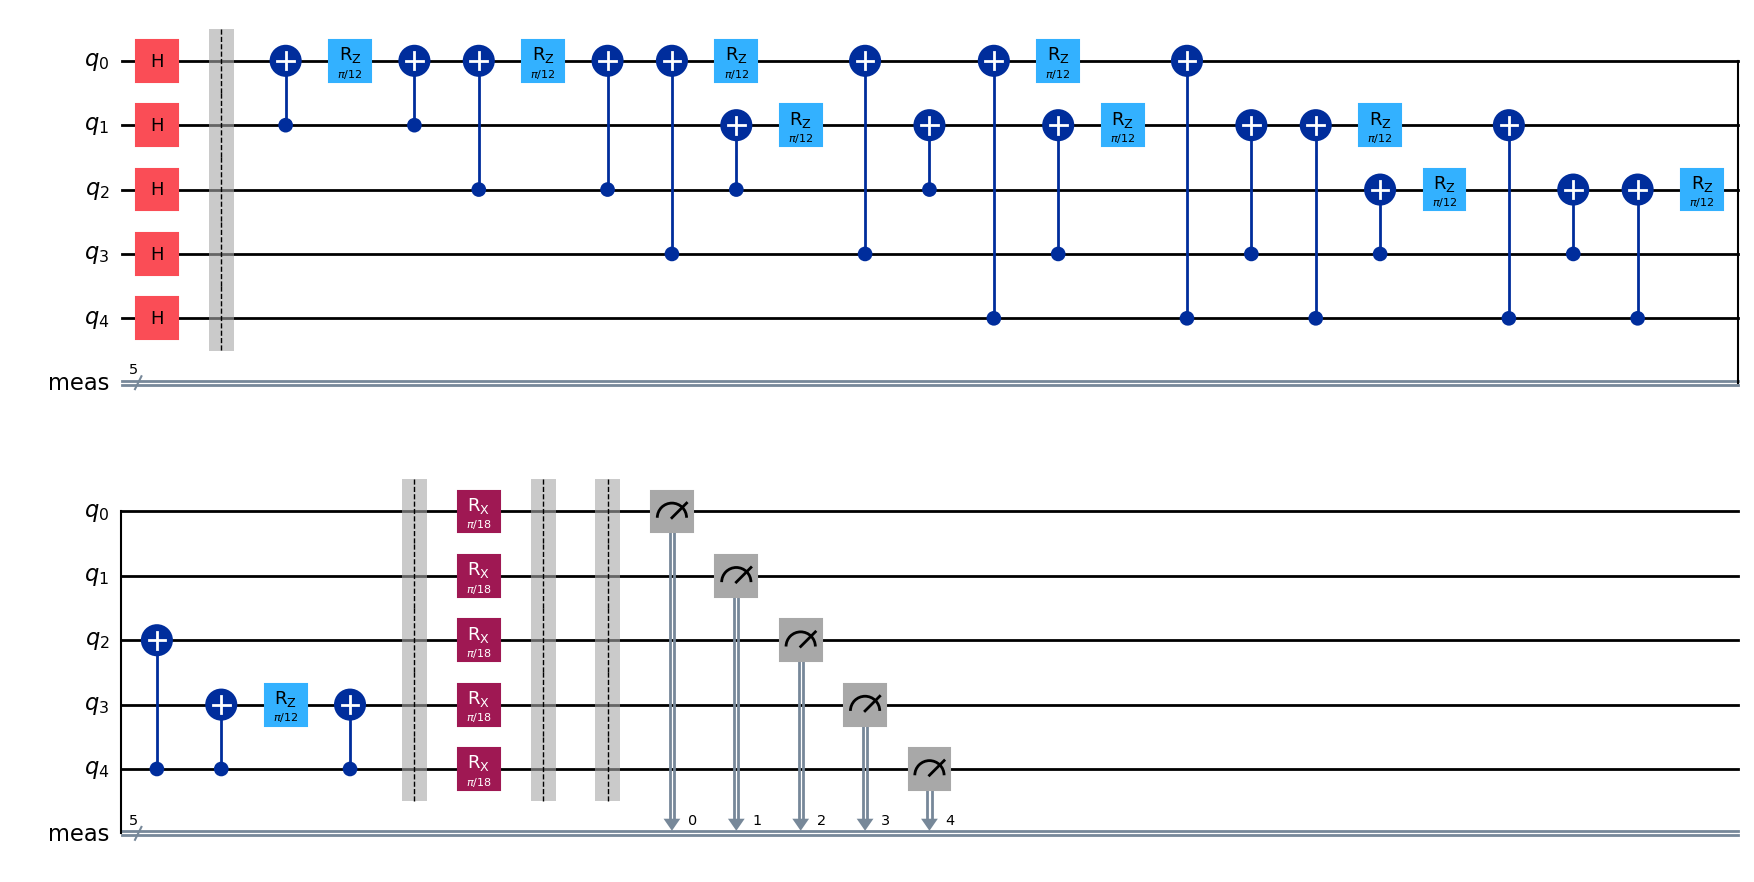

In [30]:
# for graph 5 nodes all connectd to each other
n = 5
qc = QuantumCircuit(n)
qc.h([i for i in range(n)])
qc.barrier()
def cost():
    for i in range(0, n-1):
        for j in range(i+1, n):
            qc.cx(j, i)
            qc.rz(pi/12, i)
            qc.cx(j, i)
    qc.barrier()
def mixer():
    qc.rx(pi/18, [i for i in range(n)])
    qc.barrier()
def apply_cost_mixer(p):
    for i in range(p):
        cost()
        mixer()
apply_cost_mixer(1)
qc.measure_all()
qc.draw(output='mpl')

In [31]:
simulator = AerSimulator(method="statevector", device="GPU")

qc.save_statevector()

result = simulator.run(qc).result()
sv = result.get_statevector()
counts = result.get_counts(qc)
for key, value in counts.items():
    print(key, ': ', value)

10010 :  27
00100 :  39
10000 :  43
11000 :  27
11011 :  33
11111 :  61
11010 :  23
00101 :  26
10001 :  22
01001 :  31
00011 :  24
00111 :  27
10101 :  19
00110 :  26
00001 :  36
11100 :  28
10111 :  50
10100 :  27
01111 :  39
00010 :  37
01110 :  22
11110 :  35
10110 :  29
00000 :  60
11001 :  25
01010 :  26
10011 :  26
11101 :  36
01000 :  43
01100 :  22
01011 :  25
01101 :  30
